# Seed05 Mutation Down Best Individual Analysis

In this Jupyter notebook we will analyze the statistics of the best individual at the end of 500,000 generations of seed05's *mutation down* condition. These statistics were computed using **aevol_misc_ancestor_stats** and using the lineage file *lineage-b000000000-e000500000-i1012-r1024.ae* as the input. This means that individual # 1012 was the top-ranked individual. The parameter file for this experiment can be found [here](https://github.com/davisbk/thesis/blob/master/src/param_files/seed05/seed05_mut_down_param.in).

We will analyze:
1. [genome size](#genome_size)
2. **number of functional genes**
3. **mean size of functional genes**
4. **proportion of coding bases (i.e. inside functional genes)**
5. **metabolic error**

<a id='genome_size'></a>
## 1. Genome Size

### Read in the data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

WINDOW_SIZE = 10000

# The root directory where our data is stored and where we want to output the results
INPUT_ROOT_DIR = "C://ThesisData//" # laptop
OUTPUT_ROOT_DIR = INPUT_ROOT_DIR + "Graphics//Mutations//"

# The column names in ancestor_stats_fitness-b000000000-e000500000-i1012-r1024.out
fitness_names = ['generation', 'population_size', 'fitness', 'genome_size', 'metabolic_error', 'parents_metabolic_error', 'metabolic_fitness', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amount_of_compound']

# Read in the data in ancestor_stats_fitness-b000000000-e000500000-i1012-r1024.out
FITNESS_FILE_NAME = "seed05//mut_down//stats//ancestor_stats//ancestor_stats_fitness-b000000000-e000500000-i1012-r1024.out"

print("Reading in the data...")
df_seed05_mut_down_ancestor_fitness = pd.read_csv(INPUT_ROOT_DIR + FITNESS_FILE_NAME, delim_whitespace=True, skiprows=18, header=0, names=fitness_names)
print("done.")


Reading in the data...
done.


### Plot genome size

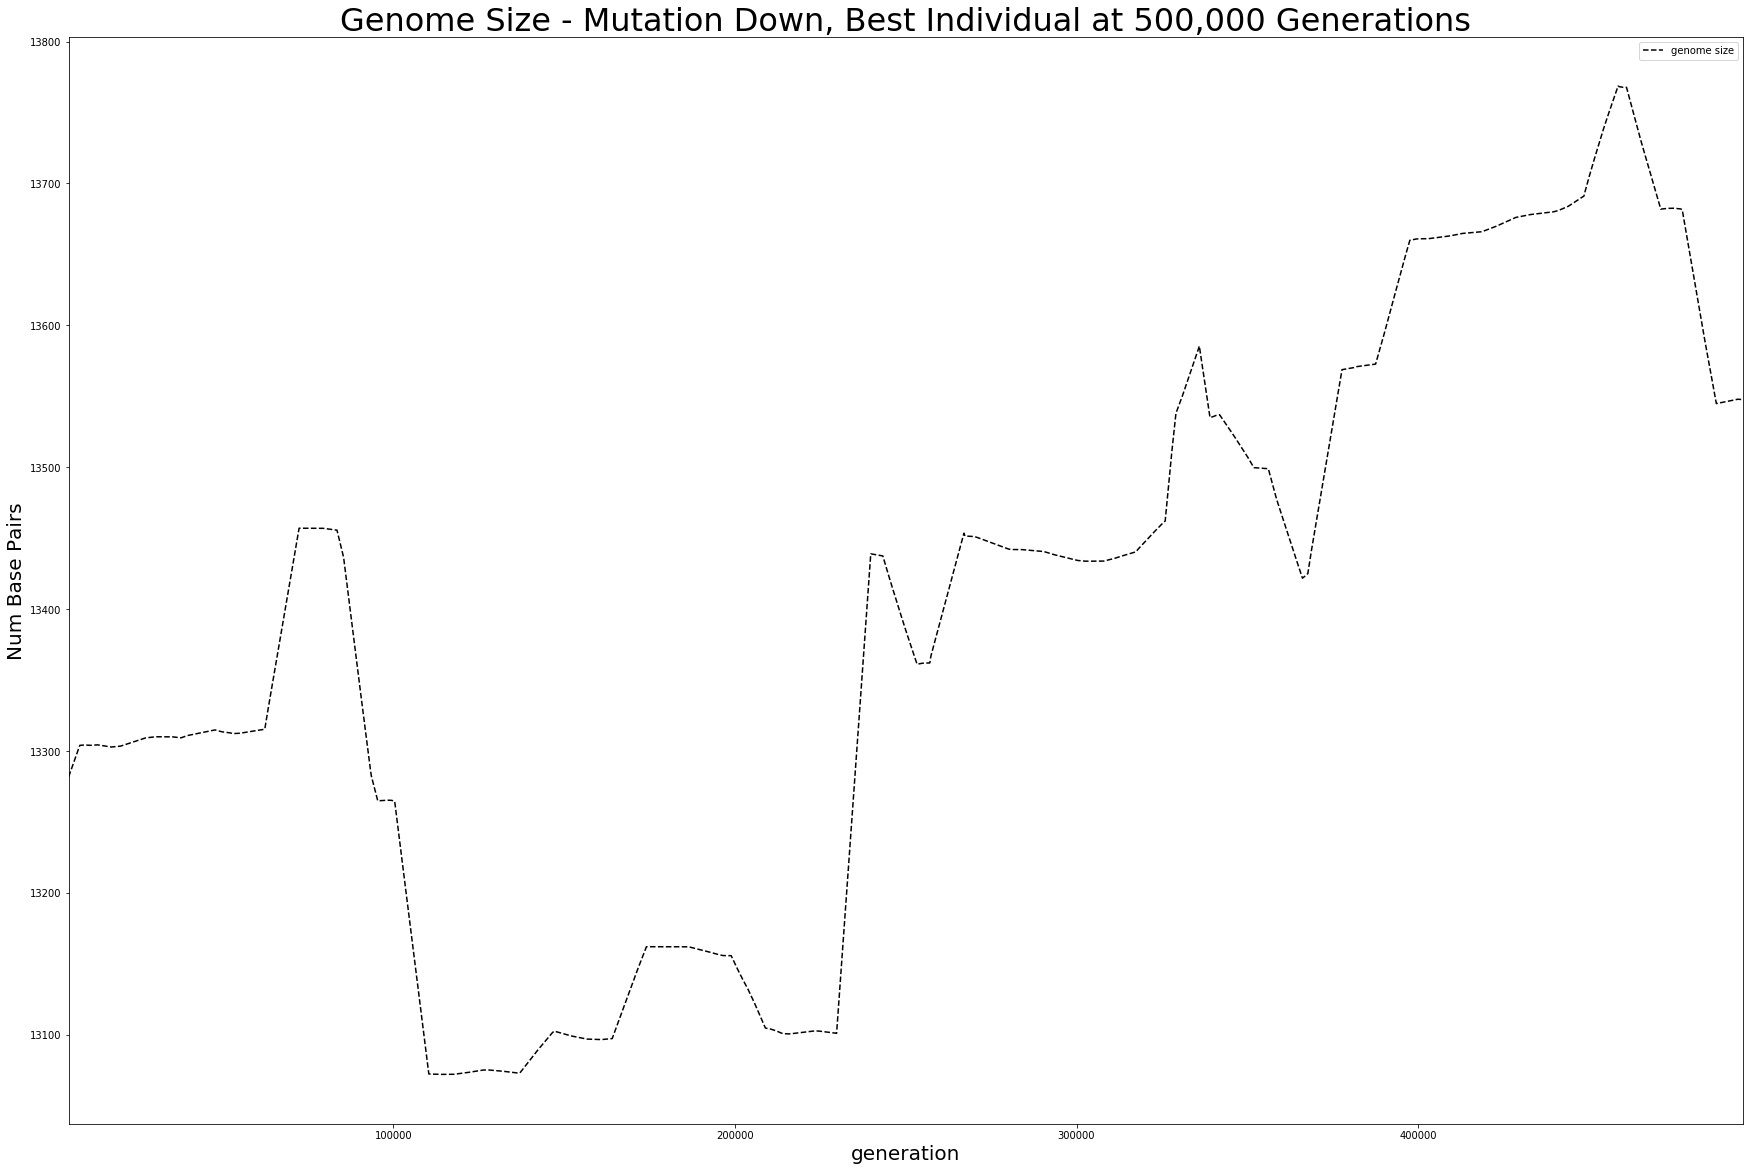

In [10]:
# Create new figure
fig_genome_size_best = plt.figure(figsize=(30,20))
ax_genome_size_best = fig_genome_size_best.add_subplot(111)
ax_genome_size_best.set_title("Genome Size - Mutation Down, Best Individual at 500,000 Generations", fontsize=32)
ax_genome_size_best.set_xlabel("Generation", fontsize=20)
ax_genome_size_best.set_ylabel("Num Base Pairs", fontsize=20)

df_tmp1 = df_seed05_mut_down_ancestor_fitness[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp1.plot(x='generation', y='genome_size', linestyle='dashed', color=(0.0,0.0,0.0), label='genome size', ax=ax_genome_size_best)
